Create 3D density plots

1-02-2025

In [8]:
# import packages
import pandas as pd
import numpy as np 
import seaborn as sns
import math
import itertools
from mpl_toolkits.mplot3d import Axes3D
import time
from copy import copy
import os
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [ ]:
# set paths
path_to_repo = "..."

os.chdir(path_to_repo)

atlas_meta_path = "output/tables/disease_mapping/atlas_meta.csv"
cancer_meta_path = "output/tables/disease_mapping/dmg_meta.csv"
ms_meta_path = "output/tables/disease_mapping/ms_meta.csv"
cell_culture_meta_path = "output/tables/disease_mapping/dropseq_meta.csv"

atlas_umap_coords_path = "output/tables/disease_mapping/atlas_umap_coords.csv"
cancer_umap_coords_path = "output/tables/disease_mapping/dmg_umap_coords.csv"
ms_umap_coords_path = "output/tables/disease_mapping/ms_umap_coords.csv"
cell_culture_umap_coords_path = "output/tables/disease_mapping/dropseq_umap_coords.csv"
# read in metadata and umap coords
atlas_md = pd.read_csv(atlas_meta_path, index_col=0)
cancer_md = pd.read_csv(cancer_meta_path, index_col=0)
ms_md = pd.read_csv(ms_meta_path, index_col=0)
dropseq_md =pd.read_csv(cell_culture_meta_path, index_col=0)

atlas_coords = pd.read_csv(atlas_umap_coords_path, index_col=0)
cancer_coords = pd.read_csv(cancer_umap_coords_path, index_col=0)
ms_coords = pd.read_csv(ms_umap_coords_path, index_col=0)
dropseq_coords = pd.read_csv(cell_culture_umap_coords_path, index_col=0)

In [12]:
# rename columns
atlas_coords.rename(columns=dict(zip(atlas_coords.columns[[-2,-1]], 
                                     ["UMAP_1", "UMAP_2"])), 
                                     inplace=True)

cancer_coords.rename(columns=dict(zip(cancer_coords.columns[[-2,-1]], 
                                     ["UMAP_1", "UMAP_2"])), 
                                     inplace=True)

ms_coords.rename(columns=dict(zip(ms_coords.columns[[-2,-1]], 
                                     ["UMAP_1", "UMAP_2"])), 
                                     inplace=True)

dropseq_coords.rename(columns=dict(zip(dropseq_coords.columns[[-2,-1]], 
                                     ["UMAP_1", "UMAP_2"])), 
                                     inplace=True)

In [13]:
# combine metadata and umap coords
atlas = pd.concat([atlas_md, atlas_coords], axis=1)
cancer = pd.concat([cancer_md, cancer_coords], axis=1)
ms = pd.concat([ms_md, ms_coords], axis=1)
dropseq = pd.concat([dropseq_md, dropseq_coords], axis=1)

atlas_postnatal = atlas.loc[atlas["dev.group"] != "Fetal",:]

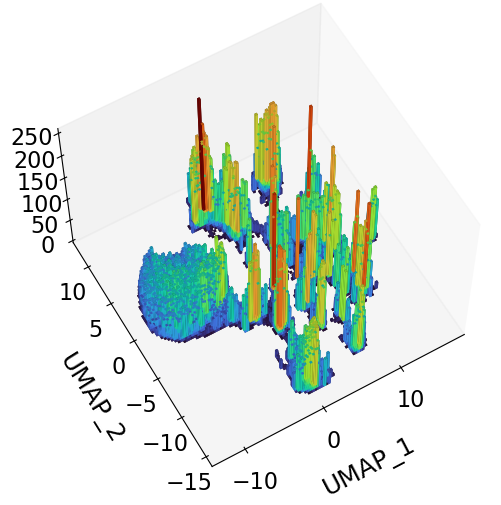

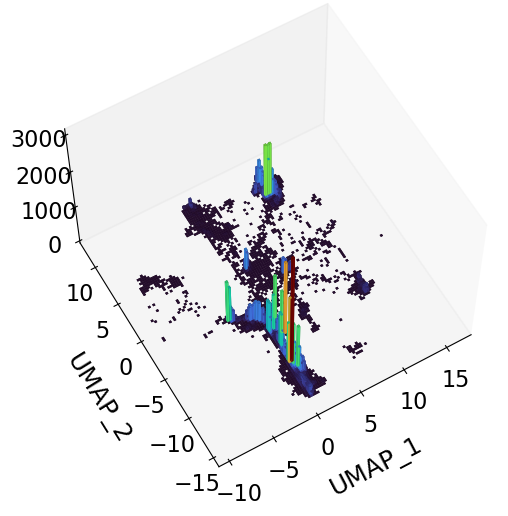

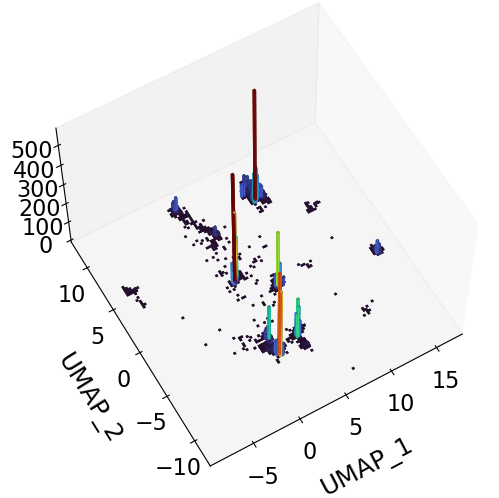

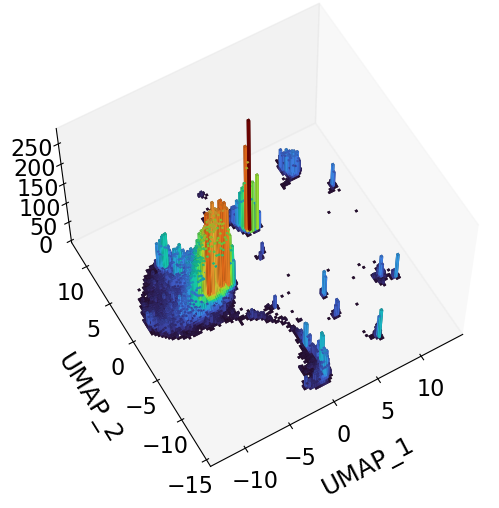

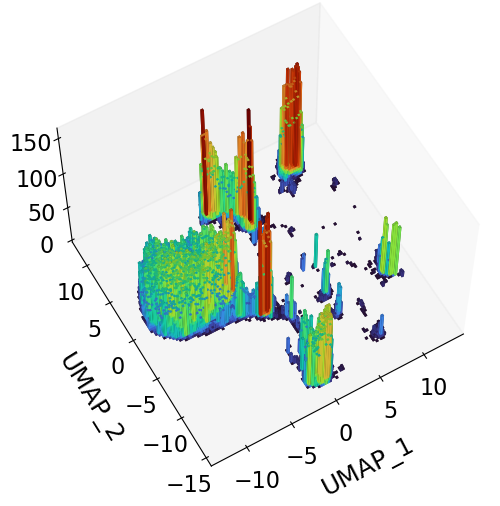

In [14]:
# plot datasets
df_list = [atlas,cancer,dropseq,ms, atlas_postnatal]
names= ["atlas","cancer","dropseq","ms","atlas_postnatal"]
for i in range(len(df_list)):

  df = df_list[i]
  fig = plt.figure(figsize=(6, 6))     #create a canvas, tell matplotlib it's 3d
  ax = fig.add_subplot(111, projection='3d')
  hist, xedges, yedges = np.histogram2d(df["UMAP_1"], df["UMAP_2"], bins=100)
  xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

  hist = hist.T
  xpos = xpos.flatten()/2.
  ypos = ypos.flatten()/2.
  zpos = np.zeros_like (xpos)

  dx = xedges [1] - xedges [0]
  dy = yedges [1] - yedges [0]
  dz = hist.flatten()
  cmap = copy(plt.get_cmap('turbo'))
  
  max_height = np.max(dz)   # get range of colorbars so we can normalize
  min_height = np.min(dz)
  # scale each z to [0,1], and get their rgb values
  rgba = [] 
  for k in dz:
      if k !=0:
        r = cmap((k-min_height)/max_height)
      else:
        r= (0.0,0.0,0.0,0.0)
      rgba.append(r)  
      
  ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
  ax.set_xlabel("UMAP_1",fontsize=18)
  ax.set_ylabel("UMAP_2",fontsize=18)
  ax.set_zlabel("",fontsize=10)
  ax.view_init(60, -120)
  ax.grid(False)
  ax.set_facecolor((0.0,0.0,0.0,0.0))
  ax.tick_params(axis='both', which='major', labelsize=16, width=2.5, length=10)
  ax.xaxis.labelpad = 15
  ax.yaxis.labelpad = 15
  ax.zaxis.labelpad = 7

  
  plt.show()